In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [20]:
def sweetness_calc(row):
    """
    sweetness_calc calculates an observations numerical sweetness score using several attributes. The logic is to use Residual sugar as
    a starting point then penalizing the score due to a high acidity or possibly boosting it further froma  low acidity. Then using 10% Alcohol
    as a baseline adding a value based on a logorithmic calculation.
 
    Args:
        row: pd row object
 
    Returns:
        sweetness: Residual Sugar * (pH/(3.3 or 3.4 depending on white or red)) + 20(log(10/Alc %))
    HIIIIII
    """
    if row["type"] == "red":
        acid_penalty = row["pH"] / 3.4
    else: 
        acid_penalty = row["pH"] / 3.3
    sweetness = (row["residual sugar"] * acid_penalty) + 20*math.log(10/row["alcohol"])
    return sweetness

def sweetness_assign(row):
    if row["sweetness"] < 0:
        return 0
    elif 5 > row["sweetness"] >= 0:
        return 1 
    elif 10 > row["sweetness"] >= 5:
        return 2 
    elif 18 > row["sweetness"] >= 10:
        return 3
    else:
        return 4
    

def show_dist(attribute, bins_num=50):
    plt.hist(wine[attribute], bins=bins_num)
    plt.show()

In [4]:
wine  = pd.read_csv("wine-quality-white-and-red.csv")

Info:
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   type                  6497 non-null   object
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64

In [5]:
wine["sweetness"] = wine.apply(sweetness_calc, axis=1)
wine["sweetness_level"] = wine.apply(sweetness_assign, axis=1)

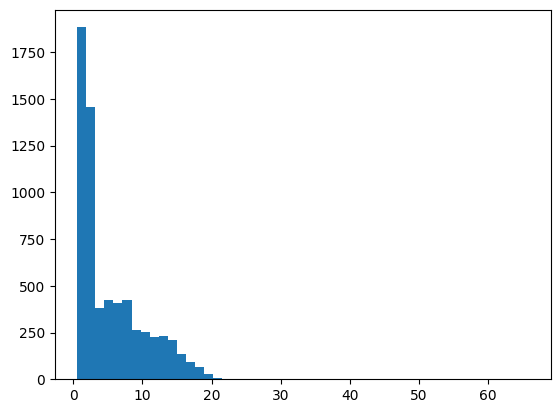

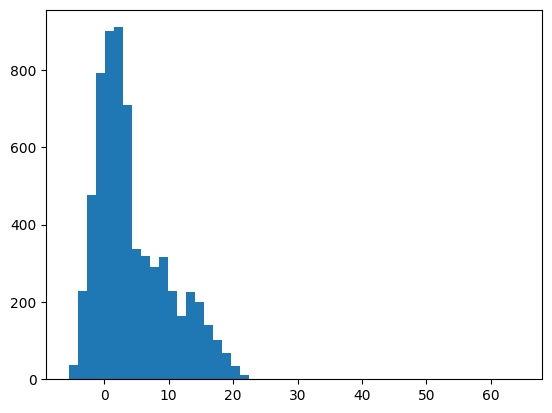

In [9]:
show_dist("residual sugar")
show_dist("sweetness")

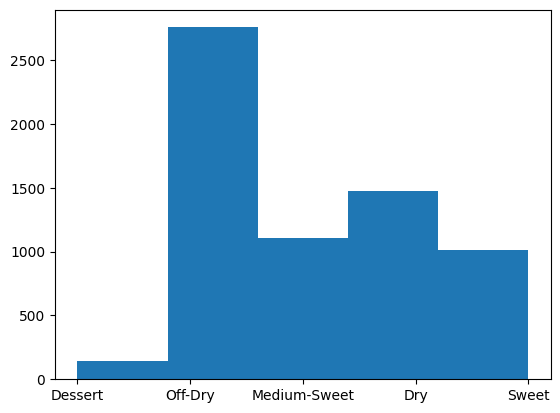

In [8]:
show_dist("sweetness_level", bins_num=5)

In [16]:
def acid_assign(row):
    """
    acid_assign a function that classifies wine to 5 levels of acidity, the numerical levels correlate roughly to:
    0. Very low Acidity
    1. Low Acidity
    2. Average Acidity
    3. High Acidity
    4. Very High Acidity
    The calculation is just a flat cutoff of the pH at different values. The calculation does differentiate between red and white wines
    as generally white wines always tend to be more acidic, i.e. white wine of average acidity would be very acidic for a red wine.

    Args:
    row: pd row type

    Returns:
    Single int correlated with level of acidity.
    """
    if row["type"] == "red":
        if row["pH"] < 3.1:
            return 4
        elif 3.3 > row["pH"] >= 3.1:
            return 3
        elif 3.4 > row["pH"] >= 3.3:
            return 2
        elif 3.6 > row["pH"] >= 3.4:
            return 1
        else:
            return 0
    else:
        if row["pH"] < 2.9:
            return 4
        elif 3.1 > row["pH"] >= 2.9:
            return 3
        elif 3.3 > row["pH"] >= 3.1:
            return 2
        elif 3.5 > row["pH"] >= 3.3:
            return 1
        else:
            return 0

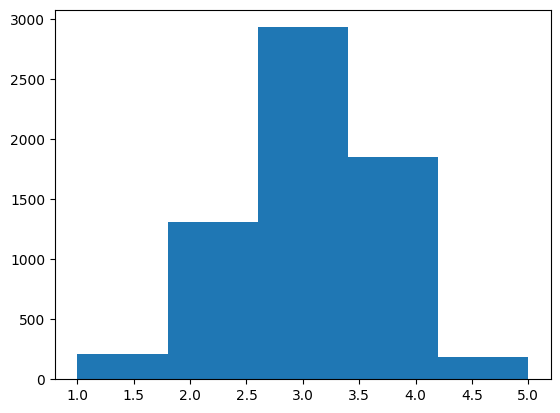

In [19]:
wine["acidity"] = wine.apply(acid_assign, axis=1)
show_dist("acidity", bins_num=5)

In [32]:
def ocean_assign(row):
    """
    ocean_assign super basic assignment, high chloride values come with a quite salty taste in wine, and when discussed favorably salty wines are said to 
    have an "ocean-like" quality. So at the relatively high cutoff point of 250 mg of chlorides / L of wine, we assign the ocean variable to 1 to create a
    sparse matrix.

    Explanation of values chosen: In a study looking at detection rates of salt in wine, they found the median concentration of NaCl to be able to be detected 
    by people was .30 and .31 for white and red wine respectively. Averaging the 2 to get a value of .305, then we have to adjust the quantity as we are measuring
    chlorides not NaCl. Thankfully according to this document for every 1000 mg/L of NaCl roughly means a concentration of about 606 mg/L of chlorides, so 
    we multiply .305 by the ratio given of .606 and get .18483.
    
    Args:
    row : pd row type
    Return:
    1 or 0 based on if the observation passes the set boundary of .25 g / L

    """
    if row["chlorides"] >= 0.18483:
        return 1
    else:
        return 0

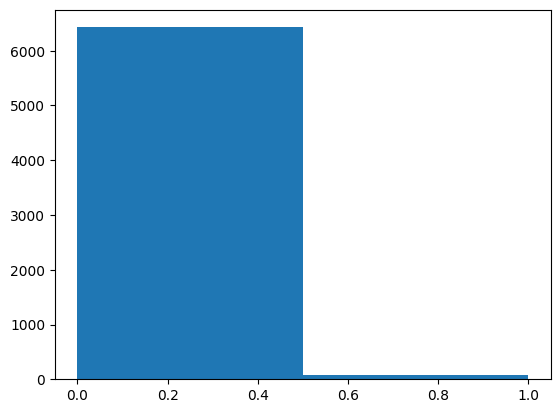

In [33]:
wine["ocean"] = wine.apply(ocean_assign, axis=1)
show_dist("ocean", bins_num=2)

In [36]:
def balsamic_assign(row):
    """
    balsamic_assign creates a sparse matrix to signal if a observation will have a strong balsamic flavor.

    Explanation: From our research we found sources that claim that if volatile acid is in a concentration above 1.4, the wine will likely develop a strong
    flavor of vinegar.

    Args:
    row : pd row type

    Returns:
    1 or 0 based on if row passes the set boundary.
    """
    if row["volatile acidity"] >= 1.3:
        return 1
    return 0

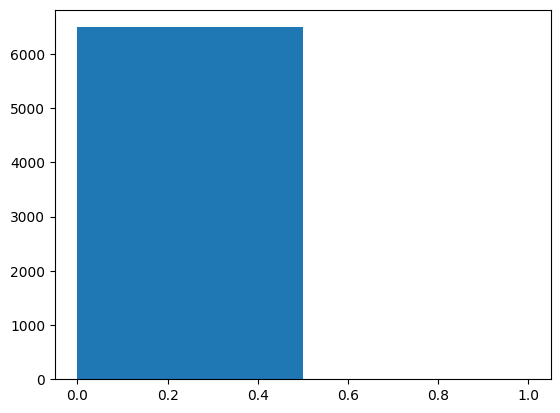

In [37]:
wine["balsamic"] = wine.apply(balsamic_assign, axis=1)
show_dist("balsamic", bins_num=2)

In [47]:
CITRIC_AVG = wine["citric acid"].mean()
CITRIC_LOW = np.quantile(wine["citric acid"], .25)
def creaminess_assign(row):
    if row["citric acid"] <= CITRIC_LOW:
        if np.random.random_integers(1,8) == 8:
            creaminess = row["fixed acidity"]/2 - row["citric acid"]
            creaminess = round(creaminess, 1)
            if creaminess < 0:
                return 0
            elif creaminess > 5:
                return 5
            return creaminess
    return 0


C:\Users\cobyw\AppData\Local\Temp\ipykernel_21704\1609319991.py:5: DeprecationWarning: This function is deprecated. Please call randint(1, 8 + 1) instead
  if np.random.random_integers(1,8) == 8:


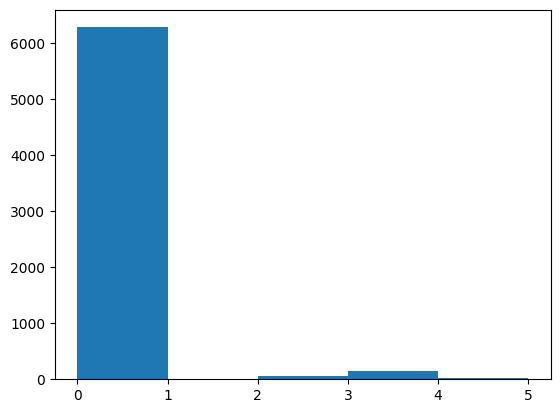

In [48]:

wine["creaminess"] = wine.apply(creaminess_assign, axis=1)
show_dist("creaminess", bins_num=5)

In [53]:


def crispness_assign(row):
    crispness = row["acidity"] - 1
    if row["citric acid"] > CITRIC_AVG:
        crispness += round(row["citric acid"]/CITRIC_AVG,1)
        if crispness > 5:
            return 5
    if row["creaminess"] > 0:
        crispness -= row["creaminess"]
        if crispness < 0:
            return 0
    return crispness


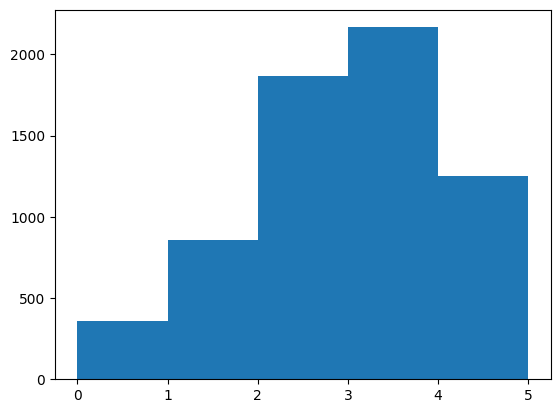

In [54]:
wine["crispness"] = wine.apply(crispness_assign, axis=1)
show_dist("crispness", bins_num=5)